# Imports

In [2]:
pip install pyseagull

Note: you may need to restart the kernel to use updated packages.


In [3]:
import seagull as sg
import seagull.lifeforms as lf
import numpy as np

In [4]:
# Some settings to show a JS animation
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"

In [5]:
pip install numpy=1.24

ERROR: Invalid requirement: 'numpy=1.24'
Hint: = is not a valid operator. Did you mean == ?
Note: you may need to restart the kernel to use updated packages.


# Glider Gen

2025-04-24 14:47:26.691 | INFO     | seagull.simulator:compute_statistics:128 - Computing simulation statistics...


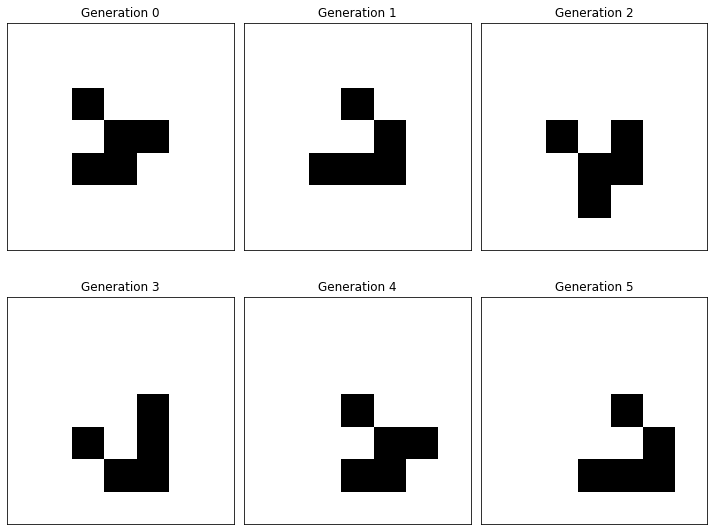

Figure saved as: ../glider_generations_0_to_5.png


In [14]:
# 1. Initialize the board
board_size = (7, 7)
board = sg.Board(size=board_size)

# 2. Add the glider lifeform
glider = lf.Glider()
board.add(glider, loc=(2, 2)) # Start closer to top-left for better visibility

# 3. Create a simulator and run the simulation for 6 generations
sim = sg.Simulator(board)
generations_to_simulate = 6 # Simulate only 6 generations (0 to 5)
sim.run(sg.rules.conway_classic, iters=generations_to_simulate)

# 4. Get the history of the simulation (all frames)
history = sim.get_history()

# 5. Plot the first 6 generations (0 to 5)
fig, axes = plt.subplots(2, 3, figsize=(10, 8)) # Increased figsize height slightly for labels
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i in range(generations_to_simulate):
    if i < len(history): # Ensure we don't try to access beyond history length
        state = history[i]
        ax = axes[i]
        ax.imshow(state, cmap='binary')
        ax.set_title(f"Generation {i}")
        # Remove ticks and labels, but keep the frame (spines)
        ax.set_xticks([])
        ax.set_yticks([])
        # Ensure the border (spines) is visible and set its color
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_edgecolor('black') # Or any other color you prefer
            # spine.set_linewidth(1) # Optional: adjust line width
    else:
        # Hide any unused subplots
        axes[i].axis('off')

plt.tight_layout(pad=1.0) # Adjust layout to prevent titles/labels overlapping

# 6. Save the figure
output_filename = "../glider_generations_0_to_5.png"
plt.savefig(output_filename, bbox_inches='tight', dpi=150)

# 7. Display the figure in the notebook
plt.show()

print(f"Figure saved as: {output_filename}")